Missing Values:
 Department ID                                   0
Category ID                                     0
Store ID                                        0
Sale Quantity                                   0
Gross Value for single Product (Single Sale)    0
Retail Value (Single Sale)                      0
Tax with Revenue                                0
Cost                                            0
Tax per unit                                    0
TotalQTY                                        0
TotalSales                                      0
SalesDate                                       0
Sales Time                                      0
Buying price per product                        0
dtype: int64


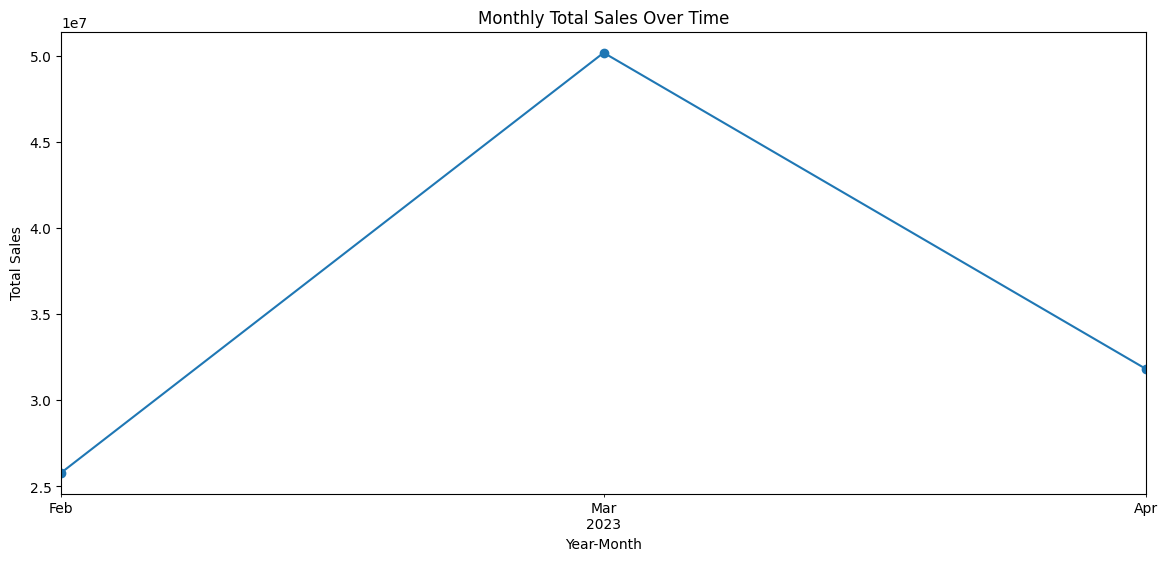

In [7]:
# Import necessary libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
sales_data = pd.read_csv('General_Sales_Data.csv')  # Replace with your actual dataset

# Check for missing values
missing_values = sales_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (replace with mean for numeric columns, mode for categorical columns)
# Repeat for other relevant columns...

# Identify and handle outliers
# Assume 'Sale Quantity' and 'Gross Value for single Product (Single Sale)' are relevant columns for outlier detection

# Ensure consistency in date formats
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])

# Feature Engineering
# Create new features: day of the week, month, year

# Time-based Analysis
sales_data['YearMonth'] = sales_data['SalesDate'].dt.to_period('M')
monthly_sales = sales_data.groupby('YearMonth')['TotalSales'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()

# Merge datasets
# (Assuming you have datasets like category_data, department_data, and store_data)

# Data Transformation
# Apply normalization to relevant numerical features
# Encode categorical variables using Label Encoding

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = sales_data.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Visualization
# Distribution of Sale Quantity
# Correlation Heatmap
# Sales by Category Name

Descriptive Statistics:
        Department ID    Category ID       Store ID  Sale Quantity  \
count  372539.000000  372539.000000  372539.000000  372539.000000   
mean      847.899925     192.334424     243.795117      31.291658   
min         9.000000       7.000000       8.000000    -248.000000   
25%       870.000000     116.000000     241.000000       2.000000   
50%       887.000000     177.000000     256.000000       7.000000   
75%       910.000000     277.000000     272.000000      23.000000   
max       939.000000    1225.000000     292.000000    4106.000000   
std       195.542087     104.581326      59.998385      87.845791   

       Gross Value for single Product (Single Sale)  \
count                                 372539.000000   
mean                                      14.644503   
min                                        0.000000   
25%                                        7.860000   
50%                                       11.530000   
75%                    

In [9]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into features (X) and target variable (y)

# Split the dataset into training and testing sets

# Train a simple model (Random Forest Regressor for example)

# Predictions

# Assess the accuracy of the model

In [10]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Cross-validation

# Sensitivity analysis and documenting model assumptions